В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/ML_Course/HM/kaggle_competition_1

/content/drive/MyDrive/ML_Course/HM/kaggle_competition_1


In [4]:
!ls

'HW 2.2 Логістична регресія з scikit learn.ipynb'   My_functions.ipynb
'HW 2.2 Поліноміальні ознаки. Pipelines.ipynb'	    process_bank_churn.py
'HW 2.3 Дерева прийняття рішень.ipynb'		    __pycache__


Посилання на файл process_bank_churn.py: https://github.com/Garina006/ML_course/blob/main/Home_work/process_bank_churn.py

In [5]:
from process_bank_churn import preprocess_data, preprocess_new_data, compute_auroc_and_build_roc

In [6]:
df = pd.read_csv("/content/drive/MyDrive/ML_Course/Data/churn_prediction/train.csv", index_col=0)

In [7]:
input_cols = list(df.columns)[2:-1]
target_col = 'Exited'

In [8]:
data = preprocess_data(df, input_cols, target_col)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [9]:
X_train = data['train_X']
train_targets = data['train_y']
X_val = data['val_X']
val_targets = data['val_y']

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
model = DecisionTreeClassifier(random_state=42)

In [12]:
%%time
model.fit(X_train, train_targets)
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

CPU times: user 79.2 ms, sys: 1.96 ms, total: 81.1 ms
Wall time: 86.5 ms


AUROC for train: 1.00


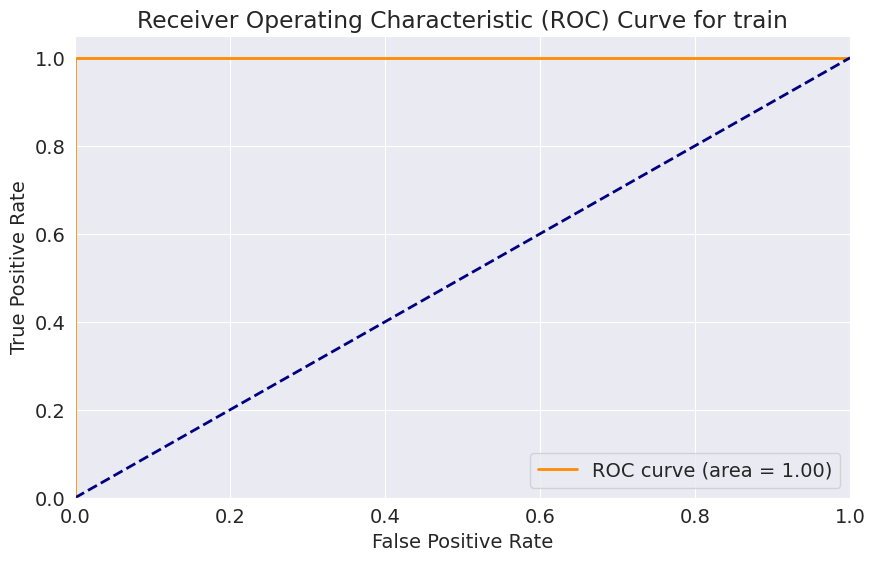

In [13]:
roc_auc_train = compute_auroc_and_build_roc(model, X_train, train_targets, 'train')

AUROC for validation: 0.77


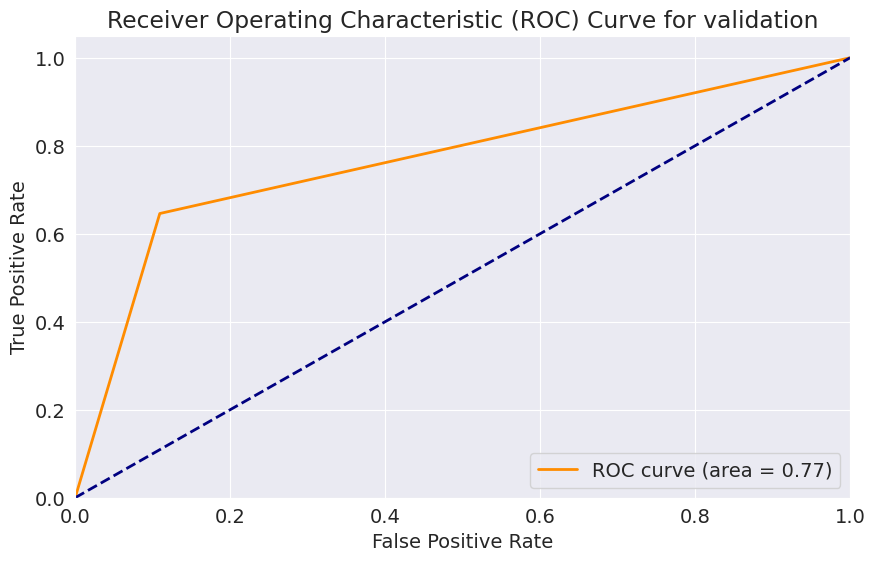

In [14]:
roc_auc_val = compute_auroc_and_build_roc(model, X_val, val_targets, 'validation')

Отримані значення AUROC:  
1.0 для train  
0.77 для val  
свідчать про перетренування моделі

In [15]:
model.tree_.max_depth

26

In [16]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)

In [17]:
%%time
model.fit(X_train, train_targets)
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)

CPU times: user 22.1 ms, sys: 0 ns, total: 22.1 ms
Wall time: 23.4 ms


AUROC for train: 0.84


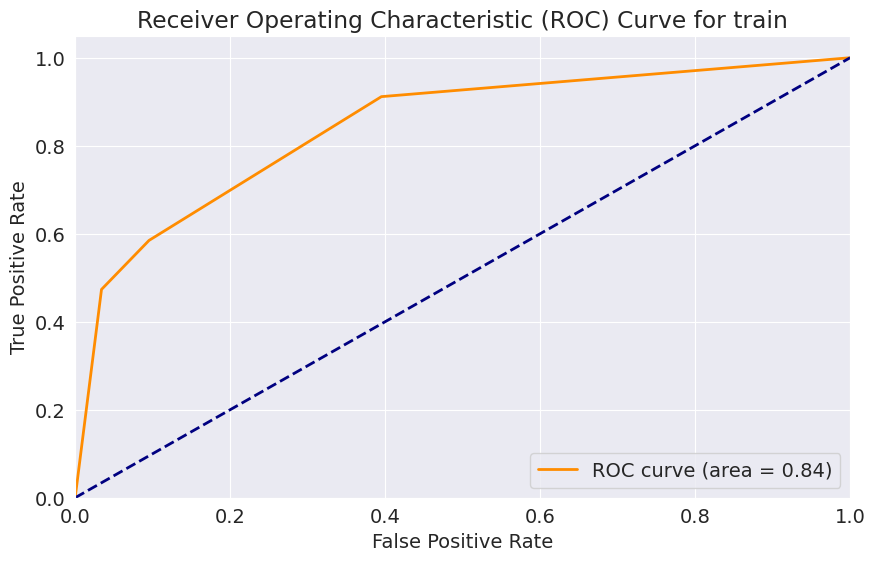

In [18]:
roc_auc_train = compute_auroc_and_build_roc(model, X_train, train_targets, 'train')

AUROC for validation: 0.85


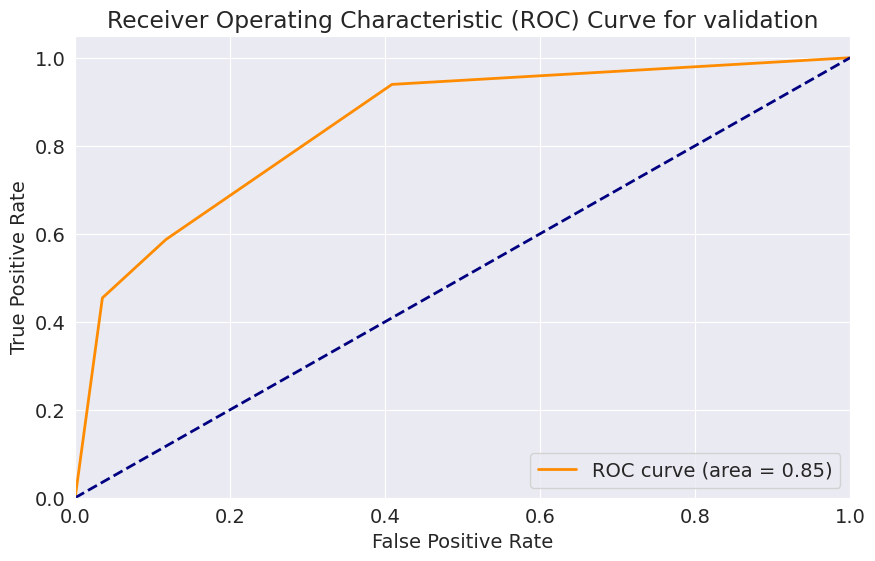

In [19]:
roc_auc_val = compute_auroc_and_build_roc(model, X_val, val_targets, 'validation')

In [20]:
from sklearn.tree import plot_tree, export_text

In [21]:
tree_text = export_text(model, max_depth=2, feature_names=list(X_train.columns))
print(tree_text)

|--- Age <= 0.46
|   |--- NumOfProducts <= 0.17
|   |   |--- class: 0.0
|   |--- NumOfProducts >  0.17
|   |   |--- class: 0.0
|--- Age >  0.46
|   |--- NumOfProducts <= 0.17
|   |   |--- class: 1.0
|   |--- NumOfProducts >  0.17
|   |   |--- class: 0.0



Найвпливовішими фічами виявились:  
Age  
NumOfProducts

In [22]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [23]:
importance_df.head(10)

,feature,importance
1,Age,0.714962
4,NumOfProducts,0.285038
0,CreditScore,0.000000
2,Tenure,0.000000
3,Balance,0.000000
5,HasCrCard,0.000000
6,IsActiveMember,0.000000
7,EstimatedSalary,0.000000
8,Encoded_Geography,0.000000
9,Encoded_Gender,0.000000


**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [24]:
from sklearn.metrics import roc_curve, auc

def auroc_calc(inputs, targets):
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  return roc_auc


In [25]:
model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_train, train_targets)

train_roc_auc = auroc_calc(X_train, train_targets)
val_roc_auc = auroc_calc(X_val, val_targets)
print(f"AUROC for Train: {train_roc_auc}")
print(f"AUROC for Val: {val_roc_auc}")

AUROC for Train: 0.9693492713737535
AUROC for Val: 0.8436638315385143


In [26]:
model = DecisionTreeClassifier(max_depth=8, random_state=42)
model.fit(X_train, train_targets)

train_roc_auc = auroc_calc(X_train, train_targets)
val_roc_auc = auroc_calc(X_val, val_targets)
print(f"AUROC for Train: {train_roc_auc}")
print(f"AUROC for Val: {val_roc_auc}")

AUROC for Train: 0.9493705098695684
AUROC for Val: 0.9035201316962757


In [27]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, train_targets)

train_roc_auc = auroc_calc(X_train, train_targets)
val_roc_auc = auroc_calc(X_val, val_targets)
print(f"AUROC for Train: {train_roc_auc}")
print(f"AUROC for Val: {val_roc_auc}")

AUROC for Train: 0.9256944626530315
AUROC for Val: 0.9219267439467729


Виглядає так, що при max_depth=5 модель найкраще генералізує дані і не перенавчається.

In [28]:
model = DecisionTreeClassifier(max_leaf_nodes=40, random_state=42)
model.fit(X_train, train_targets)

train_roc_auc = auroc_calc(X_train, train_targets)
val_roc_auc = auroc_calc(X_val, val_targets)
print(f"AUROC for Train: {train_roc_auc}")
print(f"AUROC for Val: {val_roc_auc}")

AUROC for Train: 0.9288947824729369
AUROC for Val: 0.9240688661773784


Я випробувала такі значення для max_leaf_nodes: 120, 100, 80, 50, 40  
При значенні 40 модель показує приблизно однакові значення AUROC і для трейн і для валідаційного сетів. Зауважу, що отримані значення вищі, ніж із застосуванням max_depth=5

In [29]:
model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=40, random_state=42)
model.fit(X_train, train_targets)

train_roc_auc = auroc_calc(X_train, train_targets)
val_roc_auc = auroc_calc(X_val, val_targets)
print(f"AUROC for Train: {train_roc_auc}")
print(f"AUROC for Val: {val_roc_auc}")

AUROC for Train: 0.9256944626530315
AUROC for Val: 0.9219267439467729


Поєднавши обидва гіперпараметри, отримали AUROC трохи нижчий і для трейн і для вал сетів, при цьому модель достатньо добре генералізує дані.

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [30]:
def auroc_calc_md(model, inputs, targets):
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  return roc_auc

In [31]:
def max_depth_auroc(md):
  model = DecisionTreeClassifier(max_depth=md, random_state=42)
  model.fit(X_train, train_targets)

  train_roc_auc = auroc_calc_md(model, X_train, train_targets)
  val_roc_auc = auroc_calc_md(model, X_val, val_targets)
  return {'Max Depth': md, 'Training AUROC': train_roc_auc, 'Validation AUROC': val_roc_auc}

In [32]:
%%time
auroc_df = pd.DataFrame([max_depth_auroc(md) for md in range(1, 21)])

CPU times: user 1.24 s, sys: 1.3 ms, total: 1.24 s
Wall time: 1.26 s


In [33]:
auroc_df.style.background_gradient(subset='Validation AUROC', cmap='Blues')

,Max Depth,Training AUROC,Validation AUROC
0,1,0.744727,0.734865
1,2,0.842908,0.846496
2,3,0.897184,0.891146
3,4,0.911281,0.911264
4,5,0.925694,0.921927
5,6,0.933687,0.920216
6,7,0.941508,0.914359
7,8,0.949371,0.903520
8,9,0.958598,0.884790
9,10,0.969349,0.843664


Як бачимо з отриманого датафрейму, найкраще значення AUROC для валідаційних даних отримано при max_depth = 5.

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [34]:
test_raw_df = pd.read_csv("/content/drive/MyDrive/ML_Course/Data/churn_prediction/test.csv", index_col=0)

In [35]:
scaler = data['scaler']
encoders = data['encoders']

In [36]:
X_test = preprocess_new_data(test_raw_df, scaler=scaler, encoders=encoders, input_cols=input_cols)

/content/drive/MyDrive/ML_Course/HM/kaggle_competition_1/process_bank_churn.py:181: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])
/content/drive/MyDrive/ML_Course/HM/kaggle_competition_1/process_bank_churn.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_inputs[f"Encoded_{col}"] = encoder.transform(test_inputs[[col]])
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-v

In [37]:
X_test.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Encoded_Geography,Encoded_Gender
id,,,,,,,,,,
15000,0.365155,0.214286,0.2,0.696265,0.000000,1.0,1.0,0.789477,0.411292,1
15001,0.286396,0.375000,0.5,0.000000,0.333333,1.0,1.0,0.337131,0.160177,1
15002,0.656325,0.446429,0.8,0.000000,0.333333,1.0,0.0,0.783859,0.160177,1
15003,0.682578,0.482143,0.3,0.000000,0.000000,1.0,1.0,0.834571,0.152404,1
15004,0.384248,0.446429,0.8,0.000000,0.333333,1.0,1.0,0.718421,0.152404,1


In [38]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [39]:
test_raw_df['Exited'] = model.predict_proba(X_test)[:, 1]

In [40]:
sample_submission = pd.read_csv("/content/drive/MyDrive/ML_Course/Data/churn_prediction/sample_submission.csv", index_col=0)

In [41]:
sample_submission['Exited'] = test_raw_df['Exited'].values

In [42]:
sample_submission.head(5)

,Exited
id,
15000,0.237911
15001,0.027613
15002,0.027613
15003,0.770925
15004,0.027613


In [43]:
sample_submission.reset_index().to_csv("/content/drive/MyDrive/ML_Course/Data/churn_prediction/submission_desision_tree_md_5.csv", index=False)